# Задача к собеседованию на ИППИ

 задача предложена **_Бурнаевым Е.В._**
 
23 апреля 2018 


### Задача

Задача классификации заключается в том, что по выборке данных $$\{(\mathbf{x}_i, y_i = y(\mathbf{x}_i))\}_{i=1}^{n}, \; \mathbf{x}_i \in \mathbb{R}^d,\ y_i \in \{-1,1\}$$
необходимо построить модель зависимости $\hat{y}(\mathbf{x})$ такую, что $\hat{y}(\mathbf{x}) \in \{-1,1\}$ и для большинства значений $\mathbf{x}$ прогноз метки класса $\hat{y}(\mathbf{x})$ совпадает с настоящей меткой класса $y(\mathbf{x})$.

Рассматривается модель линейной разделяющей гиперплоскости $$\hat{y}(\mathbf{x}) = sign(\mathbf{x}_i^T\mathbf{w} + w_0)$$

Для оценки вектора параметров $\mathbf{w}, w_0$ максимизируется отступ разделяющей гиперплоскости от объектов обучающей выборки:

$$\underset{\mathbf{w}, w_0, ||\mathbf{w}|| = 1}{\max}M,$$
$$s.t. \ y_i(\mathbf{x}_i^T\mathbf{w} + w_0) \geq M, \; i = \overline{1,n}.$$

Нужно описать, как решать такую задачу оптимизации и какими свойствами обладает ее решение.

### Решение
#####  1. Классы разделимы

Вместо использования ограничений, поделим обе части неравенства на модуль вектора весов.
Эквивалентное неравенство:
	$$\dfrac{1}{||\mathbf{w}||} y_i(\mathbf{x}_i^T\mathbf{w} + w_0) \geq M,$$
	или, взяв $||\mathbf{w}|| = \frac{1}{M}$,
		$$\underset{\mathbf{w}, w_0}{\min} ||\mathbf{w}||^2,$$
	$$s.t. \ y_i(\mathbf{x}_i^T\mathbf{w} + w_0) \geq 1, \; i = \overline{1,n}.$$

Функция Лагранжа:
$$L = \dfrac{1}{2}||\mathbf{w}||^2 - \sum_{i=1}^{N}\lambda_i(y_i(\mathbf{x}_i^T\mathbf{w} + w_0) - 1),$$

условия Каруша-Куна-Таккера:
- стационарности: $\underset{\mathbf{x}}{\max}\ L = L(\hat{\mathbf{x}})$

- дополняющей нежесткости: $\lambda_i(y_i(\mathbf{x}_i^T\mathbf{w} + w_0) - 1) = 0, \; i = \overline{1,N}$
-  неотрицательности: $\lambda_i \geq 0,  \; i = \overline{1,N}$


Из условия стационарности мы должны приравнять производные к нулю по $\mathbf{w}$ и $w_0$. 
	\begin{align}
	\label{eq::derivatives}
\mathbf{w} = \sum_{i=1}^{N}\lambda_i y_i \mathbf{x}_i
\\
	 0 = \sum_{i=1}^{N}\lambda_i y_i
	\end{align}	
	Подставив эти значения в функцию Лагранжа, получим
	$$L = \sum_{i=1}^{N}\lambda_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{k=1}^N\lambda_i\lambda_ky_iy_k\mathbf{x}_i^T\mathbf{x}
_k,$$ и теперь нужно минимизировать $-L$ при $\lambda_i \geq 0$.

Условие дополняющей нежесткости: 
$$\lambda_i(y_i(\mathbf{x}_i^T\mathbf{w} + w_0) - 1) = 0, \; i = \overline{1,N}$$

Либо $(y_i(\mathbf{x}_i^T\mathbf{w} + w_0) = 1$ при $\lambda_i > 0$, то есть $\mathbf{x}_i$ лежит на _границе_ разделяющей области, либо $(y_i(\mathbf{x}_i^T\mathbf{w} + w_0) > 1$ при $\lambda_i = 0$, и тогда объект на границе не лежит.

$$\mathbf{w} = \sum_{i=1}^{N}\lambda_i y_i \mathbf{x}_i$$

 Вектор $\mathbf{w}$ есть линейная комбинация  так называемых **опорных объектов**, для которых выполнено условие $\lambda_i \neq 0$.
 
 Чтобы найти $w_0$, нужно решить условие дополнительной нежесткости для одного из опорных объектов.

In [ ]:
# создаем 20 случайных точек, для двух классов
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [3, 3], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_constant = np.ones(len(X))
# обучим модель
clf_no_weights = svm.SVC(kernel = 'linear')
clf_no_weights.fit(X, y)

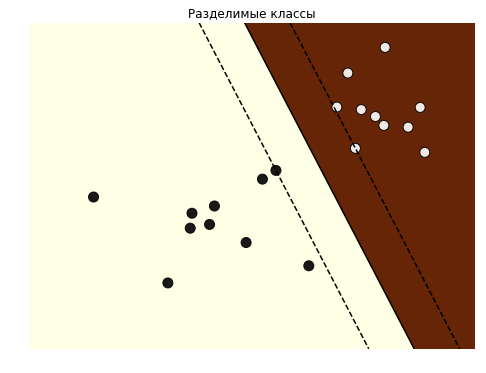

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes,
                       u"Разделимые классы")
plt.show()

##### 2.  Неразделимые классы

Разрешаем классификатору допускать ошибки, но будем за них ругать.


Аналогичным образом получаем следюущую задачу c переменными $\mathbf{w}, w_0, \mathbf{\xi}$, а также ценой ошибки $C$:
$$\underset{\mathbf{w}, w_0}{\min} \dfrac{1}{2}||\mathbf{w}||^2 + C\sum_{i=1}^N \xi_i,$$
$$s.t. \xi_i \geq 0,\; y_i(\mathbf{x}_i^T\mathbf{w} + w_0) \geq 1 - \xi_i, \; i = \overline{1,n}.$$

Функция Лагранжа для данной задачи примет вид 
$$L = \dfrac{1}{2}||\mathbf{w}||^2 + C\sum_{i=1}^N\xi_i - \sum_{i=1}^N\lambda_i(y_i(\mathbf{x}_i\mathbf{w} + w_0) - (1-\xi_i)) - \sum_{i=1}^{N}\mu_i\xi_i$$

Приравняв к нулю производные, получим

$$\mathbf{w} = \sum_{i=1}^{N}\lambda_i y_i \mathbf{x}_i$$
$$0 = \sum_{i=1}^{N}\lambda_i y_i$$
$$\lambda_i = C - \mu_i$$


Функция Лагранжа может быть записана в таком виде:
$$L = \sum_{i=1}^{N}\lambda_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{k=1}^N\lambda_i\lambda_ky_iy_k\mathbf{x}_i^T\mathbf{x}
_k$$
Вновь добавляем КТ-условия:
- дополняющей нежесткости:
    + $\lambda_i(y_i(\mathbf{x}_i^T\mathbf{w} + w_0) - (1-\xi_i)) = 0, \; i = \overline{1,N}$
    + $\mu_i\xi_i = 0$
- неотрицательности: $\lambda_i \geq 0,  \; i = \overline{1,N}$

Результат: $\mathbf{w}$ есть линейная комбинация _опорных векторов_.


In [ ]:
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# для сравнения, первый график построим без весов

# обучим модель
clf_weights = svm.SVC(kernel='linear')
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(kernel = 'linear')
clf_no_weights.fit(X, y)

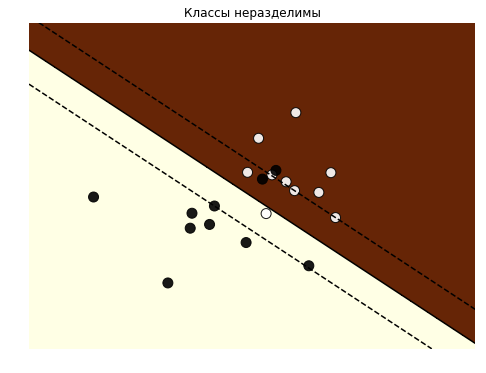

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes,
                       u"Классы неразделимы")

plt.show()

##### 3. У объектов есть веса

Мы продолжаем разрешать классификатору допускать ошибки, но теперь их стоимость различается для всех объектов выборки. 

Запишем задачу:


$$\underset{\mathbf{w}, w_0}{\min} \dfrac{1}{2}||\mathbf{w}||^2 + C\sum_{i=1}^N W_i\xi_i,$$
$$s.t. \xi_i \geq 0,\; y_i(\mathbf{x}_i^T\mathbf{w} + w_0) \geq 1 - \xi_i, \; i = \overline{1,n}.$$
За $W_i$ обозначен вес  $i$-го объекта.

Функция Лагранжа для данной задачи примет вид 
$$L = \dfrac{1}{2}||\mathbf{w}||^2 + C\sum_{i=1}^NW_i\xi_i - \sum_{i=1}^N\lambda_i(y_i(\mathbf{x}_i\mathbf{w} + w_0) - (1-\xi_i)) - \sum_{i=1}^{N}\mu_i\xi_i$$

Приравняв к нулю производные, получим
$$
\mathbf{w} = \sum_{i=1}^{N}\lambda_i y_i \mathbf{x}_i
$$
$$0 = \sum_{i=1}^{N}\lambda_i y_i$$
$$
\lambda_i = CW_i - \mu_i$$

КТ-условия не изменятся.

Единственная разница по сравнению с предыдущим случаем - другое ограничение на $\lambda_i$

При $C \to 0$ или $C \to +\infty\;$   $CW_i = C \; \Rightarrow$ влияние весов учтено не будет. 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#для наглядности, параметр sample_weight будет использоваться для увеличения/уменьшения размера точек пропорционально весу
def plot_decision_function(classifier, sample_weight, axis, title):
    # готовим сетку, на которой будем рисовать
    xx, yy = np.meshgrid(np.linspace(-4, 6, 500), np.linspace(-4, 6, 500))
    
    # делаем предсказания для сетки
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # рисуем две области и разделяющую полосу
    axis.pcolormesh(xx, yy, Z/abs(Z), cmap=plt.cm.YlOrBr)
    axis.contour(xx, yy, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    # рисуем точки
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')
    
    axis.axis('off')
    axis.set_title(title)

In [ ]:
# создаем 20 случайных точек, для двух классов
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# для сравнения, первый график построим без весов

# обучим модель
clf_weights = svm.SVC(kernel='linear')
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(kernel = 'linear')
clf_no_weights.fit(X, y)

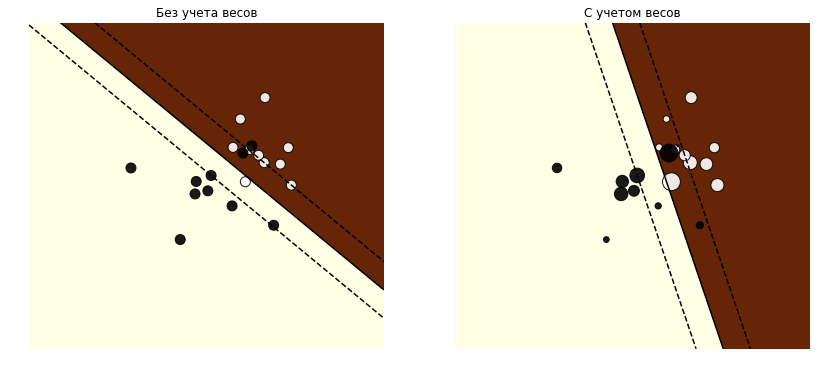

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       u"Без учета весов")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       u"С учетом весов")

plt.show()

## Литература 

- T. Hastie and others. _The elements of statistical learning_
- Mehryar Mohri and others. _Foundations of Machine Learning_
- Википедия
- Xulei Yang, Q. Song. _Weighted support vector machine for data classification_
